#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.preprocessing import StandardScaler

from datetime import datetime, timedelta
from sklearn.cluster import KMeans

#Import Data

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


#Data Cleaning

##Pengecekan data null

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [7]:
df['Ekspor'] =df['Ekspor'] * df['GDPperkapita']/100
df['Impor'] = df['Impor'] * df['GDPperkapita']/100
df['Kesehatan'] = df['Kesehatan'] * df['GDPperkapita']/100

In [8]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#Visualisasi Data

###Pengecekan korelasi antar variabel menggunakan Heatmap

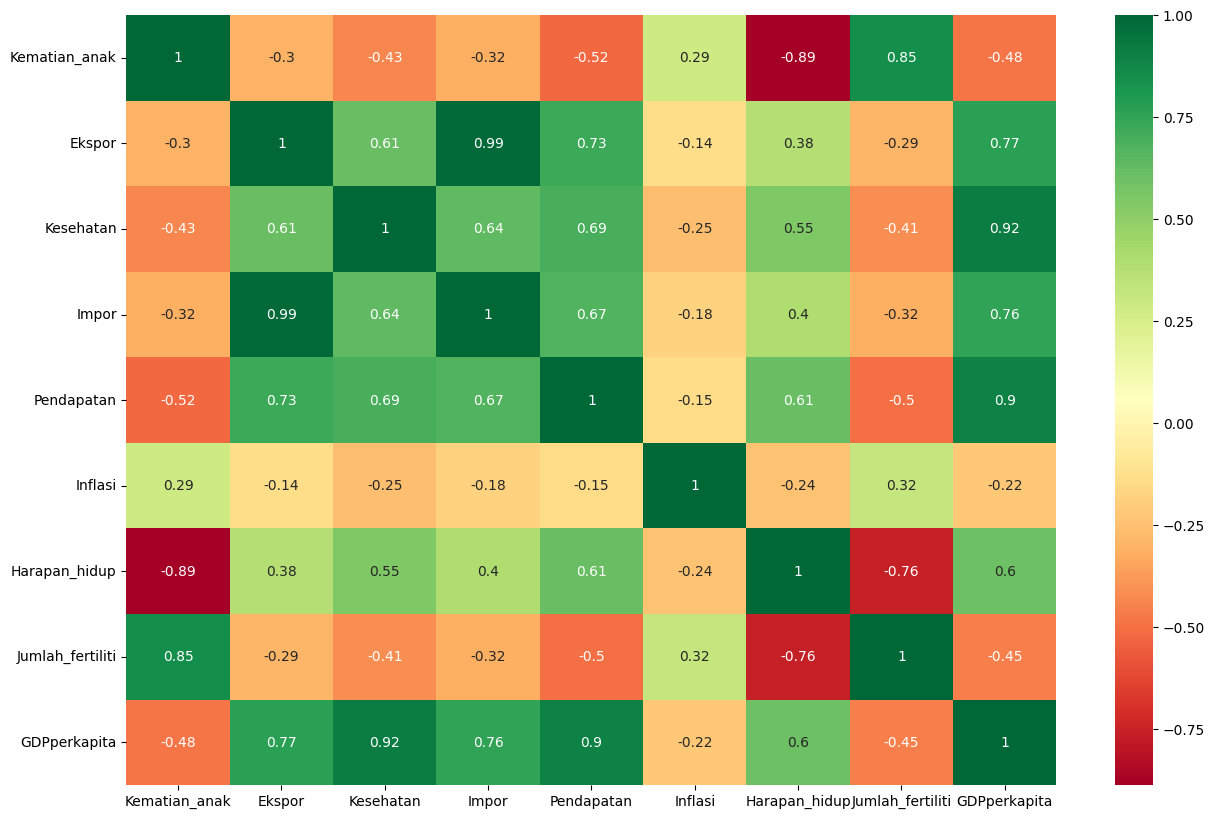

In [9]:
plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

###Tingkat negara pendapatan dan kematian anak

Text(0.5, 1.0, 'Pendapatan vs tingkat Kematian Anak')

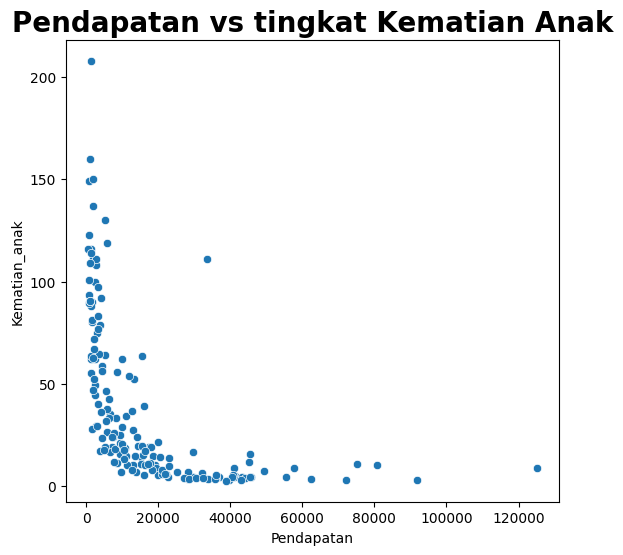

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Pendapatan',y='Kematian_anak', data=df)
plt.title('Pendapatan vs tingkat Kematian Anak',fontweight="bold", size=20)


###Pengecekan Negara terhadap tingkat Kematian Anak

In [11]:
Negara= df.groupby('Negara').Kematian_anak.sum().sort_values(ascending=False)
Negara=pd.DataFrame(Negara)
Negara1=Negara.head()
Negara2=Negara.tail()
display(Negara1.head())  
print('*'*50)
display(Negara2.tail())

,Kematian_anak
Negara,
Haiti,208.0
Sierra Leone,160.0
Chad,150.0
Central African Republic,149.0
Mali,137.0


**************************************************


,Kematian_anak
Negara,
Finland,3.0
Sweden,3.0
Singapore,2.8
Luxembourg,2.8
Iceland,2.6


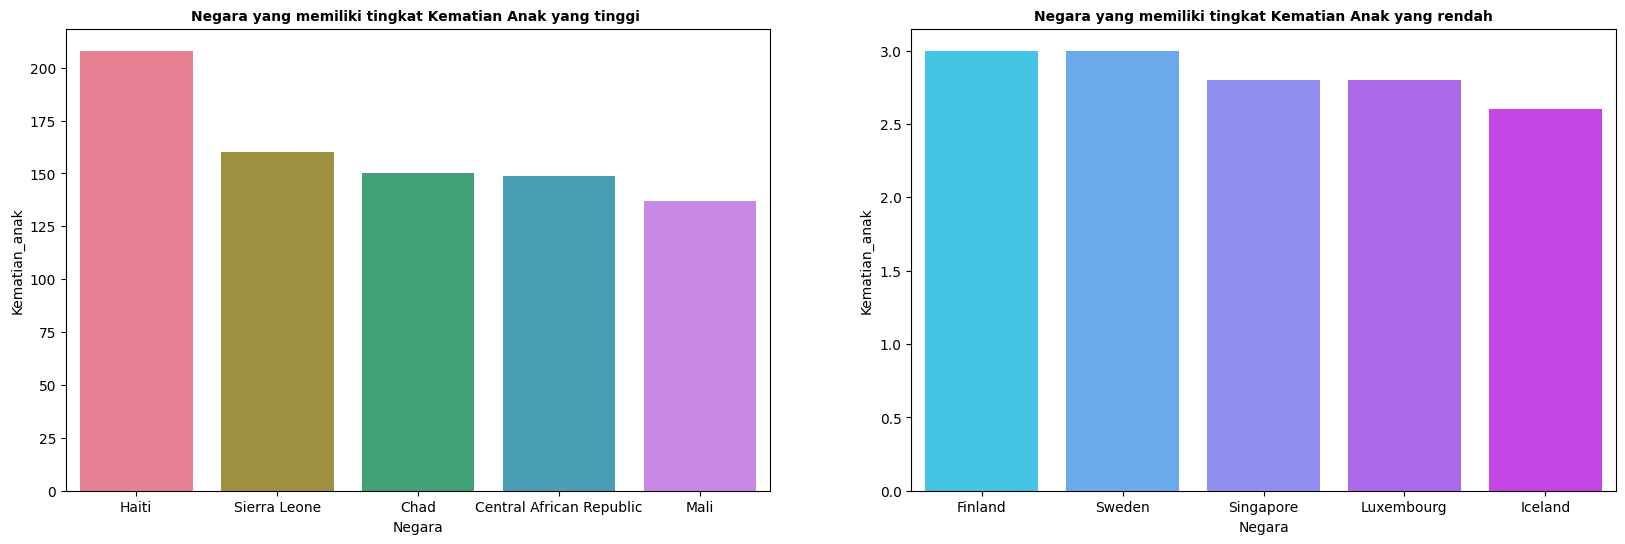

In [12]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(x=Negara1.index, y=Negara1.Kematian_anak, palette='husl')
plt.title('Negara yang memiliki tingkat Kematian Anak yang tinggi ',fontweight="bold", size=10)
plt.subplot(1,2,2)
sns.barplot(x=Negara2.index, y=Negara2.Kematian_anak, palette='cool')
plt.title('Negara yang memiliki tingkat Kematian Anak yang rendah',fontweight="bold", size=10)
plt.show()

###Pengecekan Negara terhadap tingkat Pendapatan

In [13]:
Pendapatan= df.groupby('Negara').Pendapatan.sum().sort_values(ascending=False)
Pendapatan=pd.DataFrame(Pendapatan)
Pendapatan1=Pendapatan.head()
Pendapatan2=Pendapatan.tail()
display(Pendapatan1)
print('*'* 50)
display(Pendapatan2)

,Pendapatan
Negara,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,Pendapatan
Negara,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


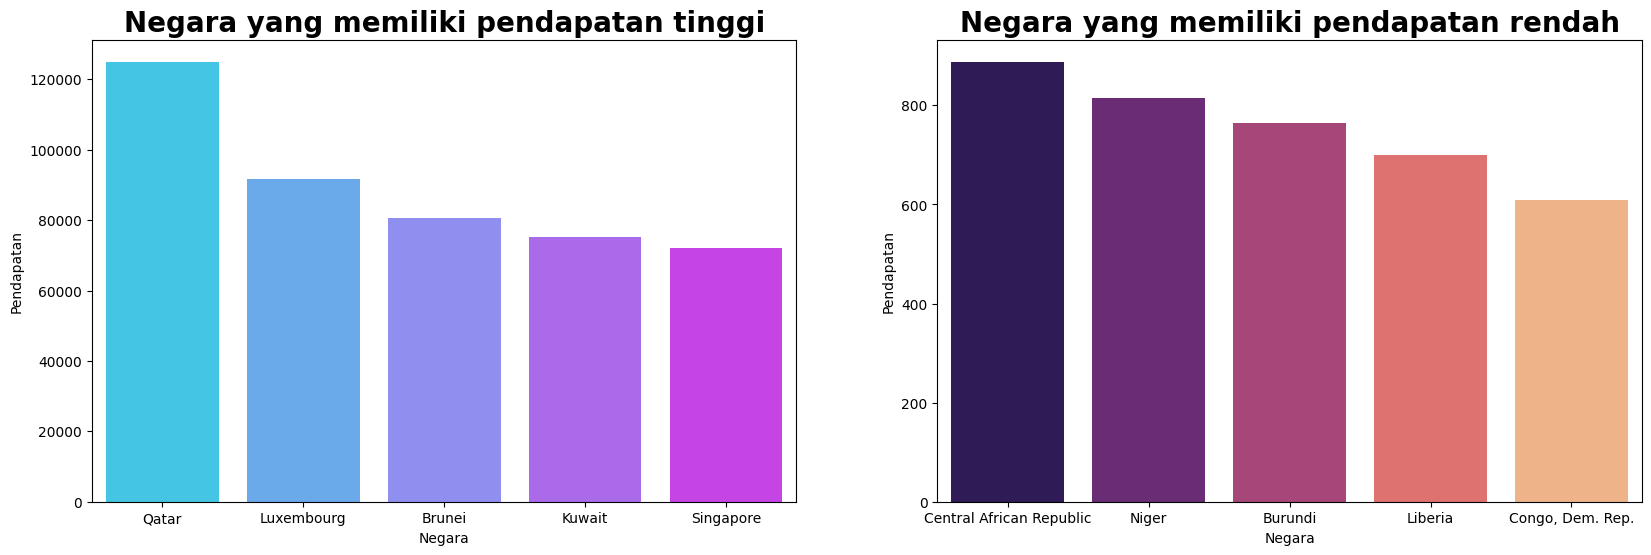

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(x=Pendapatan1.index,y= Pendapatan1.Pendapatan, palette='cool')
plt.title('Negara yang memiliki pendapatan tinggi',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(x=Pendapatan2.index, y=Pendapatan2.Pendapatan, palette='magma')
plt.title('Negara yang memiliki pendapatan rendah',fontweight="bold", size=20)
plt.show()

###Pengecekan Negara terhadap tingkat GDPperkapita

In [15]:
GDPperkapita= df.groupby('Negara').GDPperkapita.sum().sort_values(ascending=False)
GDPperkapita=pd.DataFrame(GDPperkapita)
GDPperkapita1=GDPperkapita.head()
GDPperkapita2=GDPperkapita.tail()
display(GDPperkapita1)
print('*'* 50)
display(GDPperkapita2)

,GDPperkapita
Negara,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,GDPperkapita
Negara,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


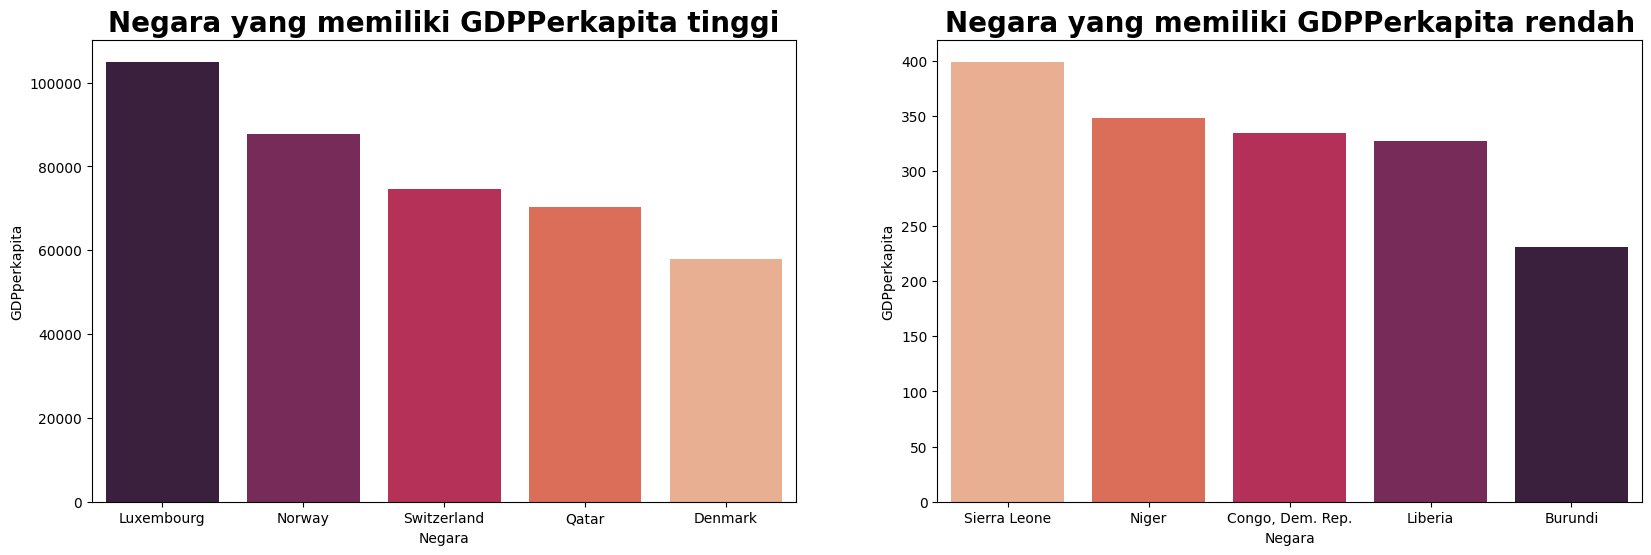

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(x= GDPperkapita1.index, y=GDPperkapita1.GDPperkapita, palette='rocket')
plt.title('Negara yang memiliki GDPPerkapita tinggi',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(x=GDPperkapita2.index,y= GDPperkapita2.GDPperkapita, palette='rocket_r')
plt.title('Negara yang memiliki GDPPerkapita rendah',fontweight="bold", size=20)
plt.show()

###Pengecekan Negara terhadap tingkat Impor

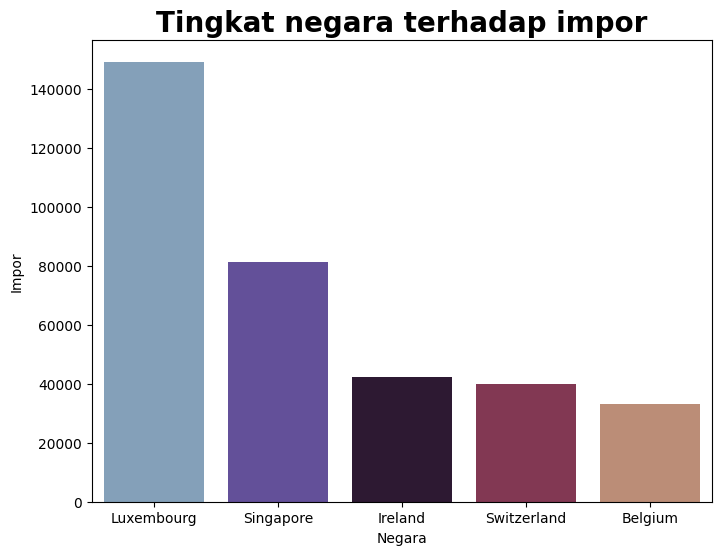

,Impor
Negara,
Luxembourg,149100.0
Singapore,81084.0
Ireland,42125.5
Switzerland,39761.8
Belgium,33166.8


,Impor
Negara,
Burundi,90.552000
Myanmar,0.651092


In [17]:
plt.figure(figsize=(8, 6))
Impor=df.groupby('Negara').Impor.sum().sort_values(ascending=False)
Impor= pd.DataFrame(Impor)
Impor1=Impor.head()
sns.barplot(x=Impor1.index,y=Impor1.Impor, palette='twilight')
plt.title('Tingkat negara terhadap impor',fontweight="bold", size=20)
plt.show()
display(Impor1)
Impor2=Impor.tail(2)
display(Impor2)

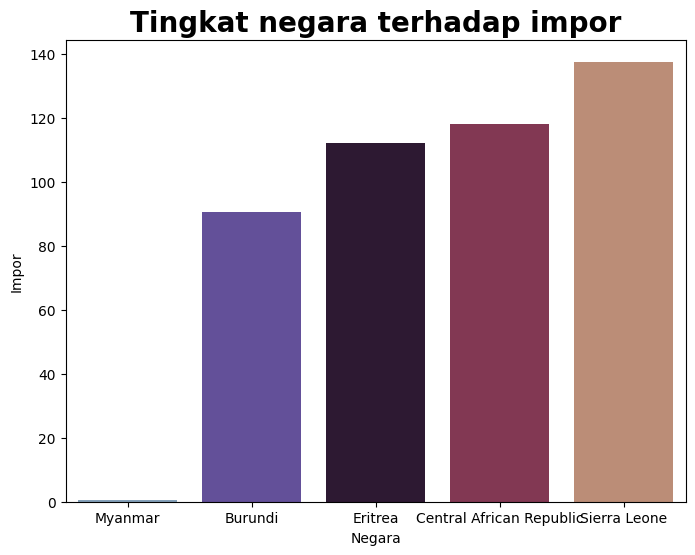

,Impor
Negara,
Myanmar,0.651092
Burundi,90.552000
Eritrea,112.306000
Central African Republic,118.190000
Sierra Leone,137.655000


,Impor
Negara,
Singapore,55371.39
Luxembourg,55371.39


In [63]:
plt.figure(figsize=(8, 6))
Impor=df.groupby('Negara').Impor.sum().sort_values(ascending=True)
Impor= pd.DataFrame(Impor)
Impor1=Impor.head()
sns.barplot(x=Impor1.index,y=Impor1.Impor, palette='twilight')
plt.title('Tingkat negara terhadap impor',fontweight="bold", size=20)
plt.show()
display(Impor1)
Impor2=Impor.tail(2)
display(Impor2)

###Pengecekan Negara terhadap tingkat Ekspor

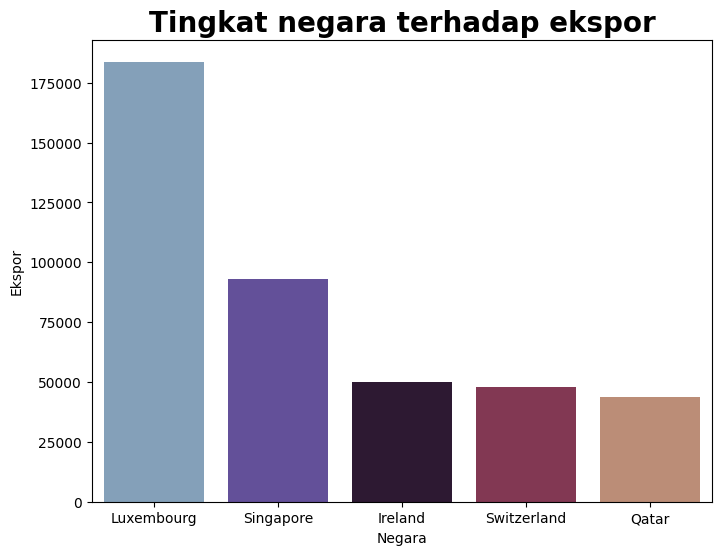

,Ekspor
Negara,
Luxembourg,183750.0
Singapore,93200.0
Ireland,50161.0
Switzerland,47744.0
Qatar,43796.9


,Ekspor
Negara,
Burundi,20.60520
Myanmar,1.07692


In [18]:
plt.figure(figsize=(8, 6))
Ekspor=df.groupby('Negara').Ekspor.sum().sort_values(ascending=False)
Ekspor= pd.DataFrame(Ekspor)
Ekspor1=Ekspor.head()
sns.barplot(x=Ekspor1.index,y=Ekspor1.Ekspor, palette='twilight')
plt.title('Tingkat negara terhadap ekspor',fontweight="bold", size=20)
plt.show()
display(Ekspor1)
Ekspor2=Ekspor.tail(2)
display(Ekspor2)

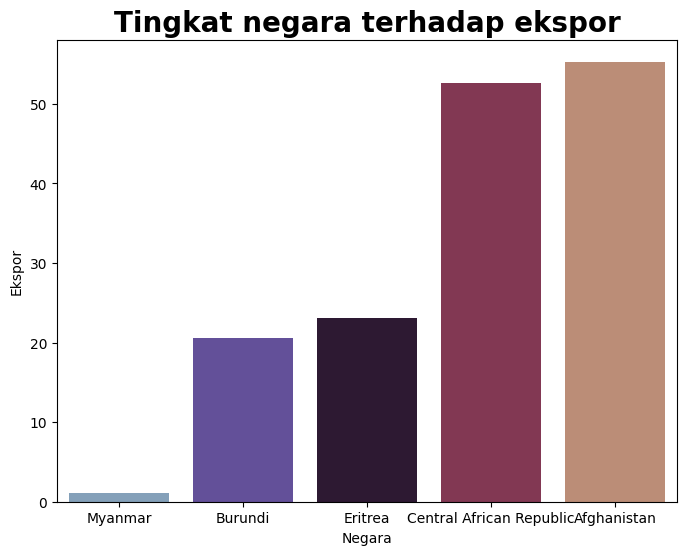

,Ekspor
Negara,
Myanmar,1.07692
Burundi,20.60520
Eritrea,23.08780
Central African Republic,52.62800
Afghanistan,55.30000


,Ekspor
Negara,
Singapore,93200.0
Luxembourg,183750.0


In [64]:
plt.figure(figsize=(8, 6))
Ekspor=df.groupby('Negara').Ekspor.sum().sort_values(ascending=True)
Ekspor= pd.DataFrame(Ekspor)
Ekspor1=Ekspor.head()
sns.barplot(x=Ekspor1.index,y=Ekspor1.Ekspor, palette='twilight')
plt.title('Tingkat negara terhadap ekspor',fontweight="bold", size=20)
plt.show()
display(Ekspor1)
Ekspor2=Ekspor.tail(2)
display(Ekspor2)

###Pengecekan Negara terhadap tingkat Harapan hidup

In [19]:
Harapan_hidup= df.sort_values(by=['Harapan_hidup'],ascending=True)
Harapan_hidup.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
166,Zambia,83.1,540.200,85.9940,451.140,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,104.652,30.2481,160.191,1030,12.10,53.1,5.31,459


In [20]:
Harapan_hidup=df.sort_values(by=['Harapan_hidup'],ascending=False)
display(Harapan_hidup[0:5])

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900


###Pengecekan Negara terhadap tingkat pengeluaran pada Kesehatan

In [21]:
Kesehatan=df.sort_values(by=['Kesehatan'], ascending= True)
Kesehatan[0:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.01,47.5,5.21,446
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.55,58.8,7.49,348
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720,7.04,66.8,2.41,988


In [22]:
Kesehatan1=df.sort_values(by=['Kesehatan'], ascending= False)
Kesehatan1[0:5]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3,6001.6,8663.60,7647.2,49400,1.220,78.7,1.93,48400
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000


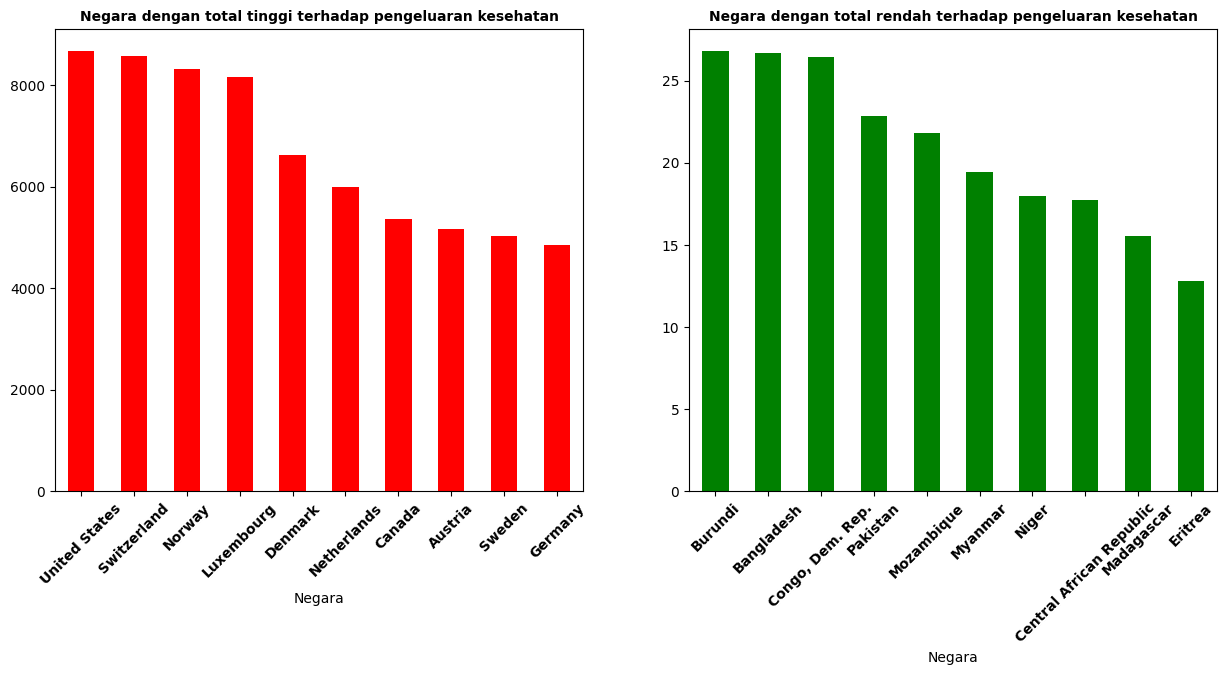

In [23]:
plt.figure(figsize=(15, 6))
He=df.groupby('Negara').Kesehatan.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='red')
plt.title('Negara dengan total tinggi terhadap pengeluaran kesehatan',fontweight="bold", size=10)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'green')
plt.title('Negara dengan total rendah terhadap pengeluaran kesehatan',fontweight="bold", size=10)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

###Pengecekan Negara terhadap tingkat Inflasi

In [24]:
In=df.sort_values(by=['Inflasi'], ascending=False).head()
In

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,1237.55,144.160,1502.55,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.9,60.9,5.21,17100


In [25]:
In=df.sort_values(by=['Inflasi'], ascending=True).head()
In

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400


###Pengecekan Negara terhadap tingkat Jumlah fertiliti (kesuburan)

In [26]:
Fertility=df.sort_values(by=['Jumlah_fertiliti'], ascending= True).head()
Fertility

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
133,Singapore,2.8,93200.00,1845.36,81084.00,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,10917.40,1531.53,10210.20,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,10715.80,960.23,10021.50,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,638.96,190.71,1279.55,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,1369.17,511.71,2364.93,9720,1.400,76.8,1.31,4610


In [27]:
Fertility1=df.sort_values(by=['Jumlah_fertiliti'], ascending=False).head()
Fertility1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231


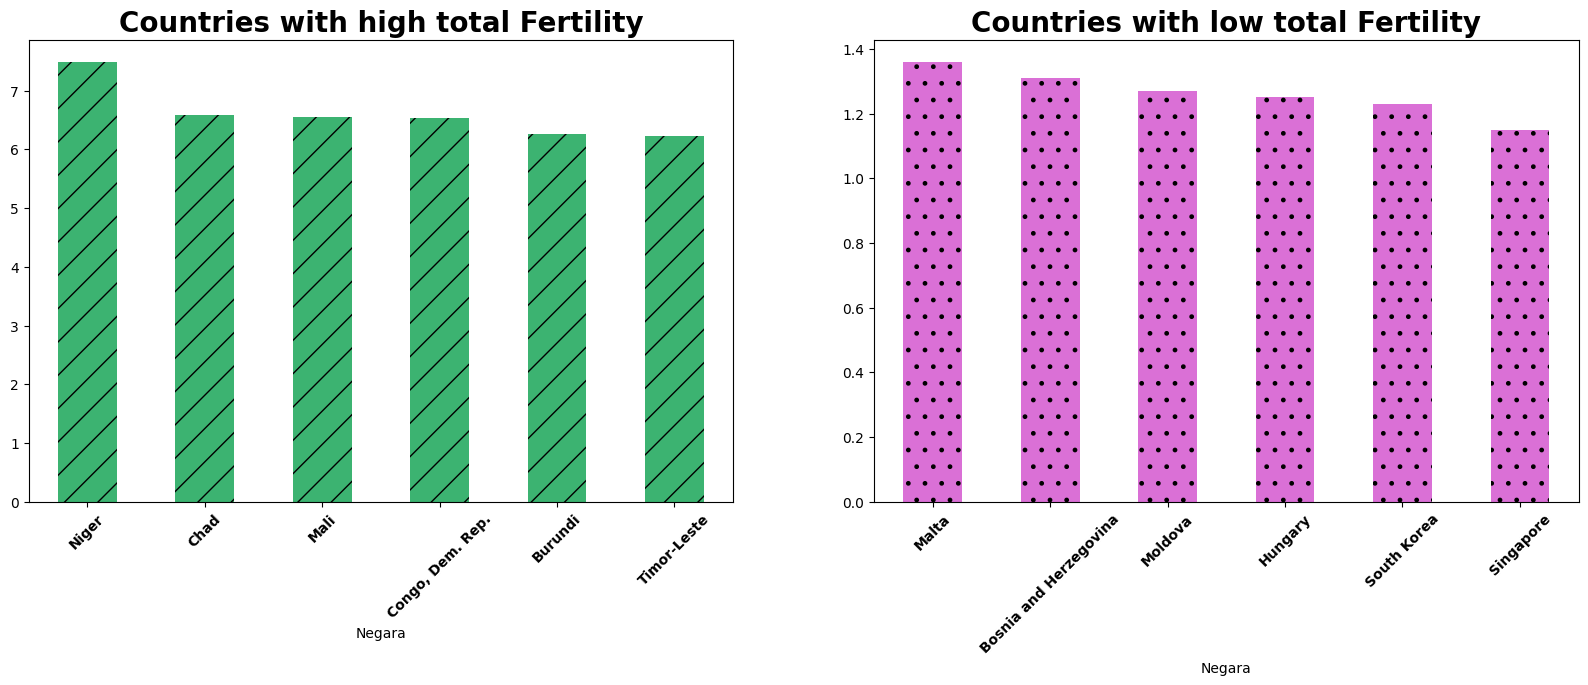

In [28]:
plt.figure(figsize=(20, 6))
Fe=df.groupby('Negara').Jumlah_fertiliti.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='.')
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

##Pengecekan variasi data berdasarkan kolom

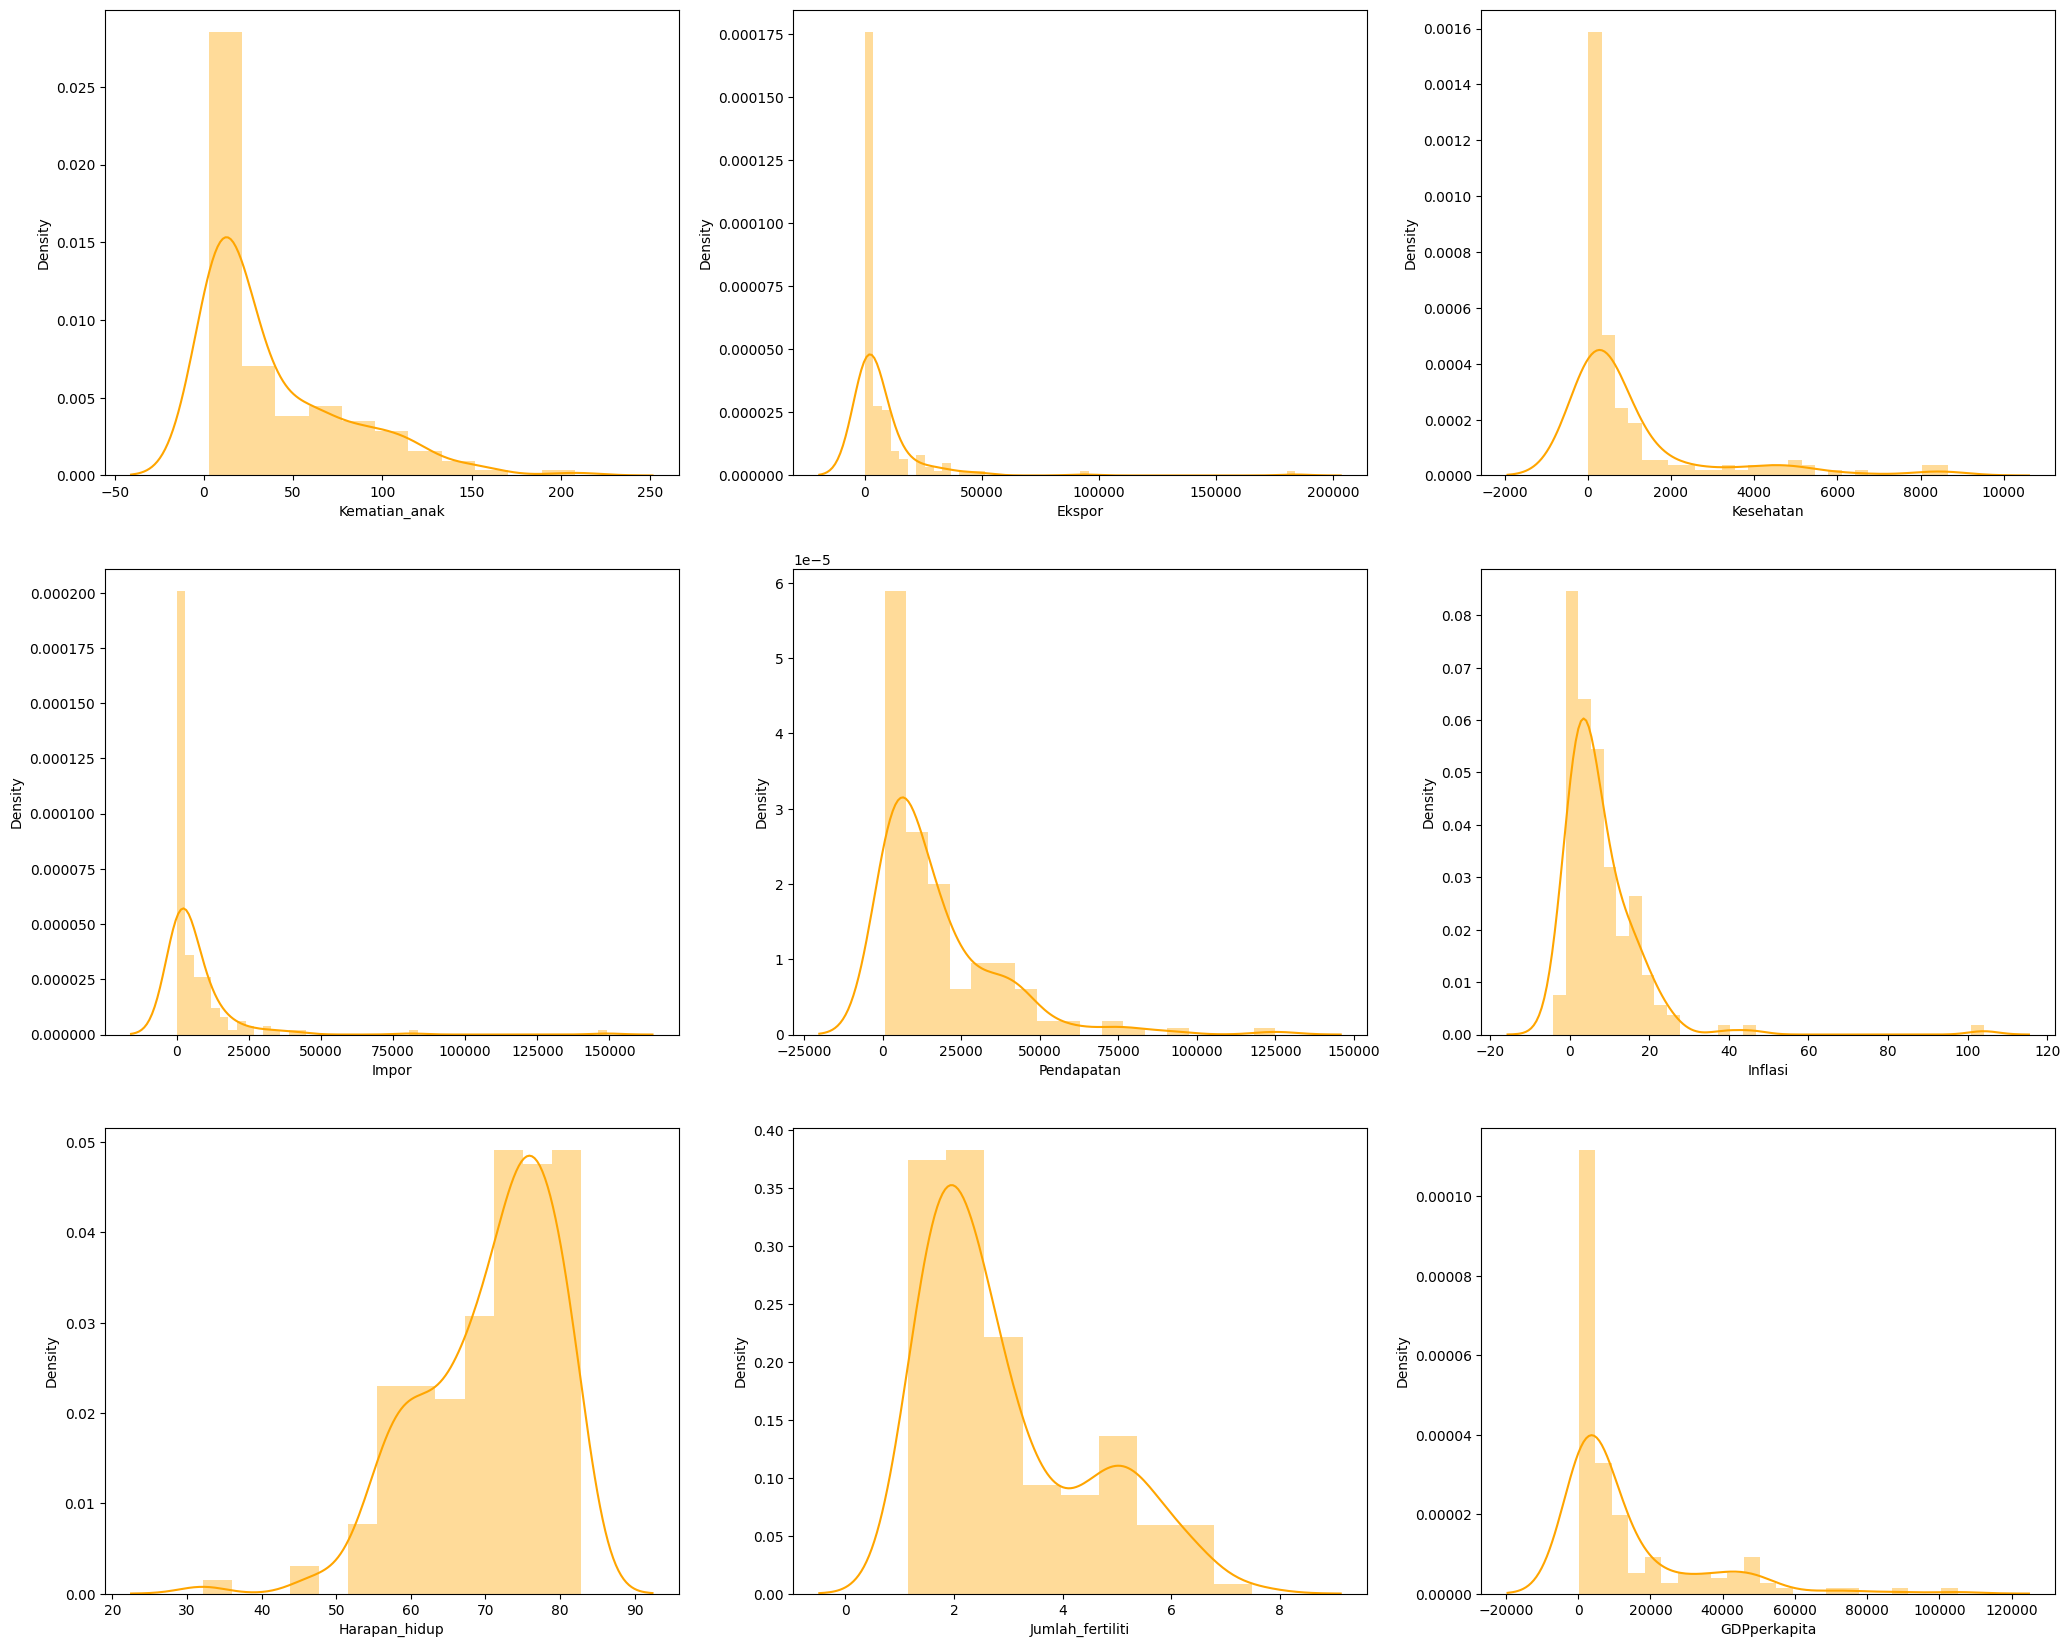

In [29]:
plt.figure(figsize = (20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='orange')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

Dapat dilihat dari plot diatas, Kematian_anak dan Pendapatan memiliki variasi data, maka dapat dipastikan untuk memilih 2 fitur tersebut untuk clustering

##Pengecekan Outliers

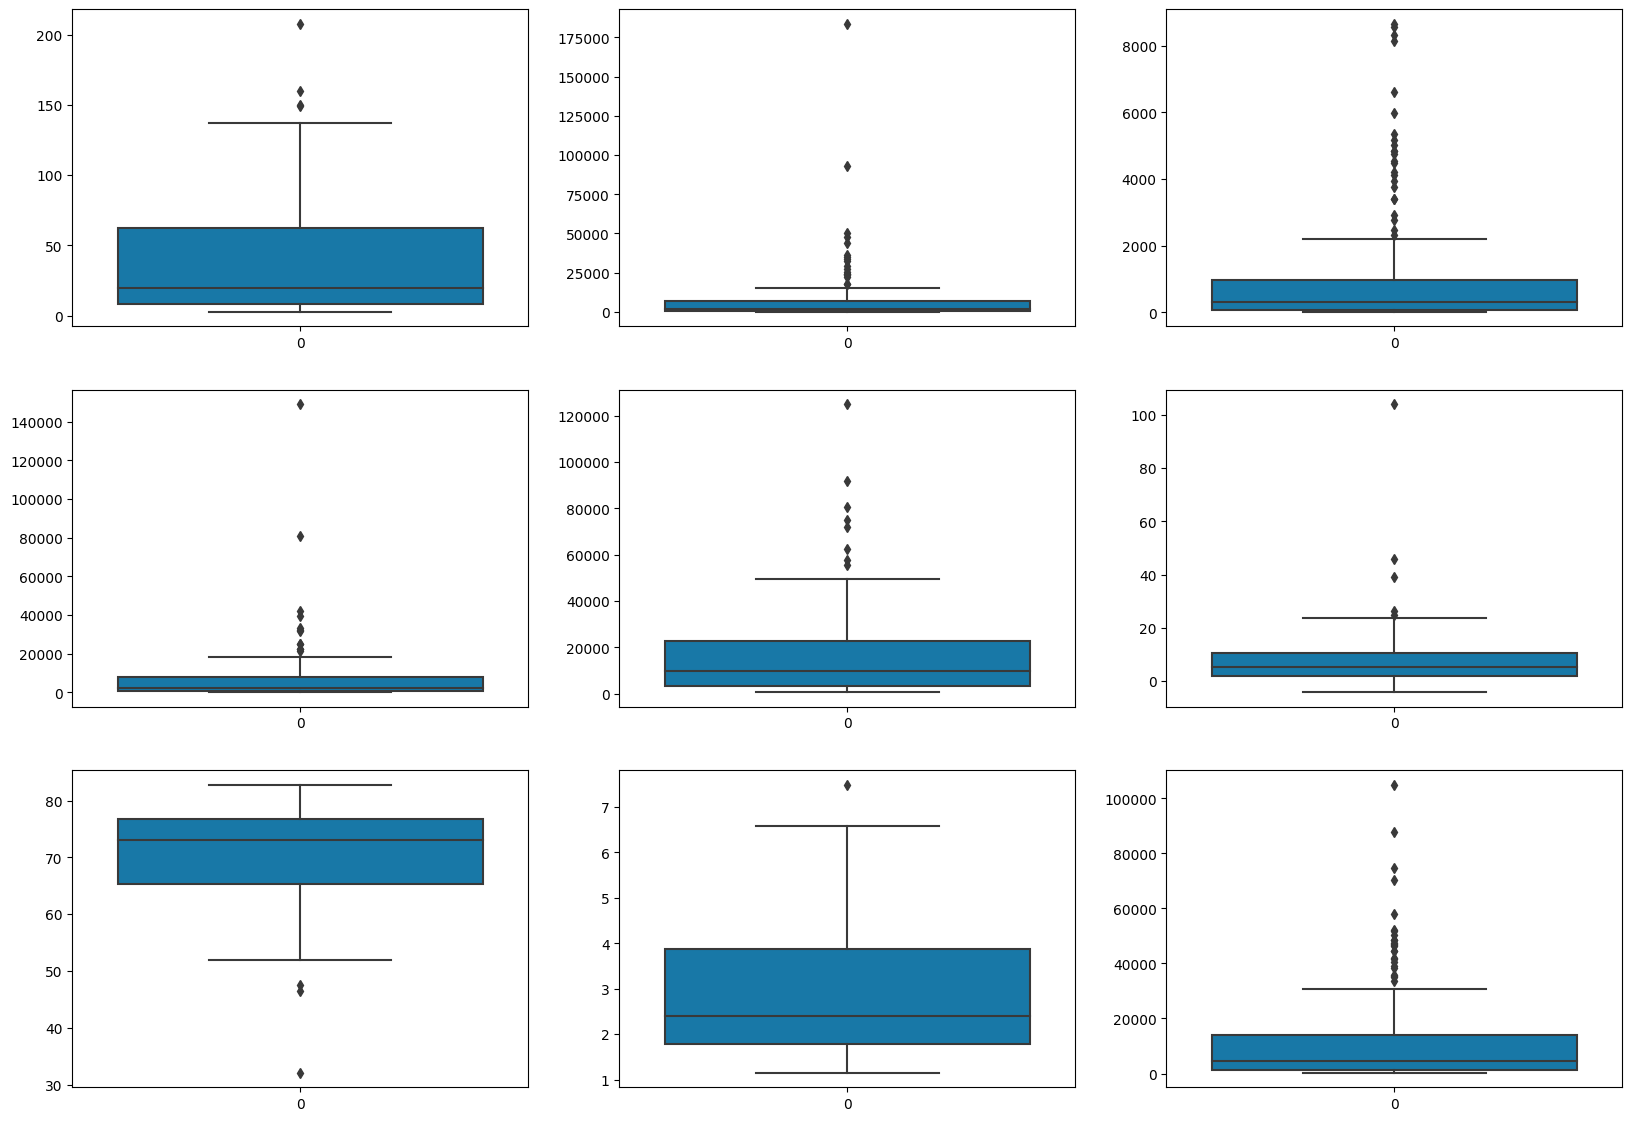

In [30]:
#sebelum handling
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='winter')

In [31]:
#Menghandle Outliers
q2 = df['Impor'].quantile(0.99)
q3 = df['Kesehatan'].quantile(0.99)
q4 = df['Pendapatan'].quantile(0.99)
q5 = df['Inflasi'].quantile(0.99)
q6 = df['Harapan_hidup'].quantile(0.99)
q7 = df['Jumlah_fertiliti'].quantile(0.99)
q8 = df['GDPperkapita'].quantile(0.99)

df['Impor'][df['Impor']>= q2] = q2
df['Kesehatan'][df['Kesehatan']>= q3] = q3
df['Pendapatan'][df['Pendapatan']>= q4] = q4
df['Inflasi'][df['Inflasi']>= q5] = q5
df['Harapan_hidup'][df['Harapan_hidup']>= q6] = q6
df['Jumlah_fertiliti'][df['Jumlah_fertiliti']>= q7] = q7
df['GDPperkapita'][df['GDPperkapita']>= q8] = q8

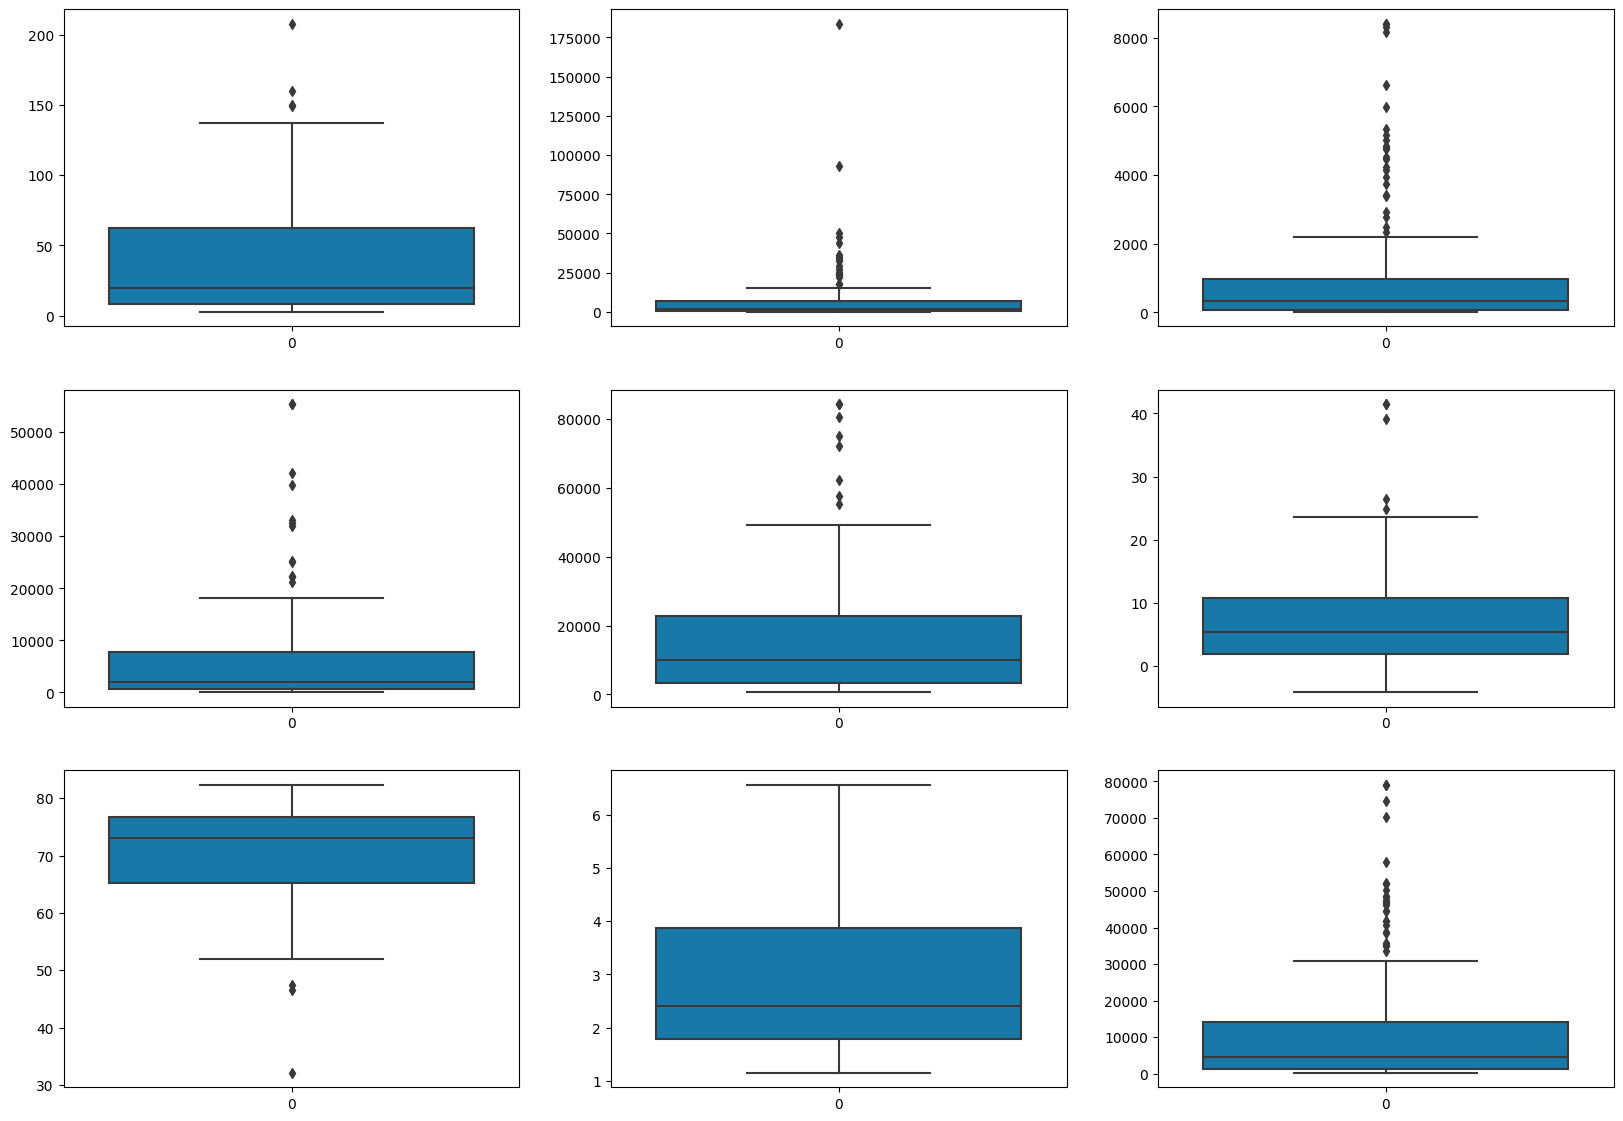

In [32]:
#hasil setelah handling
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='winter')

##Hopkin Test

In [33]:
#Pengujian Hopkins untuk melihat apakah data dapat melakukan clustering
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [35]:
#Jika nilai berada diantara {0.9,..., 0.99} berarti dapat dilakukan cluster
hopkins(df.drop('Negara', axis = 1))

0.9391329127663836

##Scaling data

In [36]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Negara', axis = 1))
df_scaled

array([[ 1.29153238, -0.4110113 , -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.35019096, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.31852577, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.36146329, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.39216643, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.38395214, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [37]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns[1:])
df_scaled.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-0.411011,-0.566958,-0.598741,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.350191,-0.440393,-0.413584,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.318526,-0.486271,-0.476100,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,-0.291375,-0.534088,-0.463973,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,-0.104331,-0.178410,0.139728,0.125254,-0.764618,0.705262,-0.543736,-0.032042


#K-mean Clustering

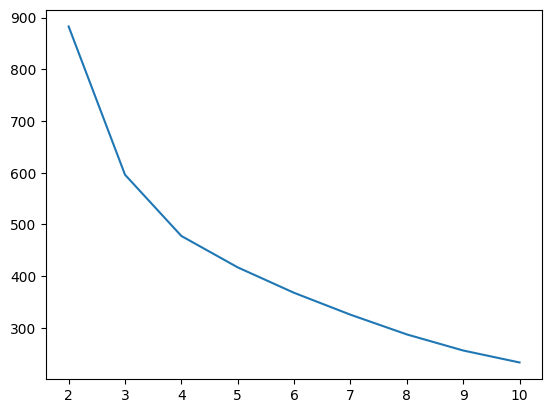

In [38]:
#Clustering menggunakan metode Elbow
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

In [39]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df_scaled)

KMeans(n_clusters=3, random_state=50)

In [40]:
df_kmean = df.copy()

In [41]:
label  = pd.DataFrame(kmean.labels_, columns= ['id_cluster'])
label.head()

,id_cluster
0,2
1,1
2,1
3,2
4,1


In [42]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [43]:
df_kmean.id_cluster.value_counts()

1    89
2    48
0    30
Name: id_cluster, dtype: int64

##Plotting Cluster

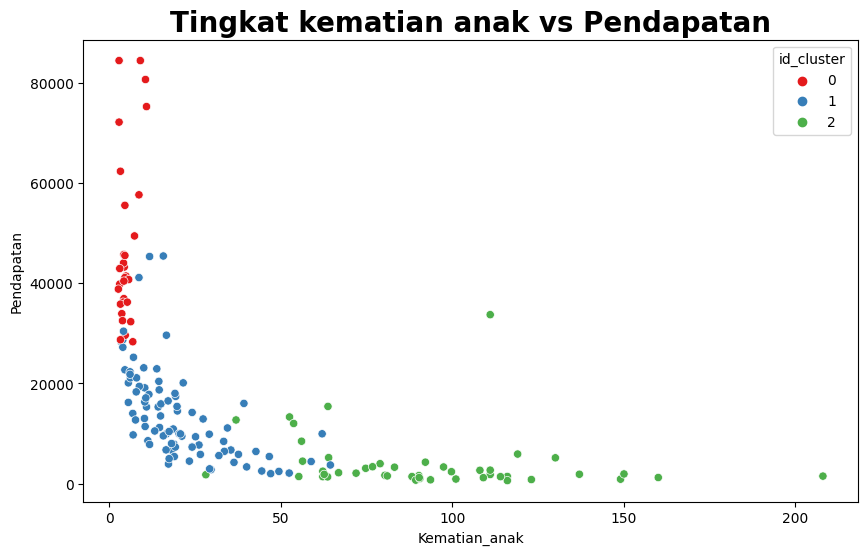

In [44]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Kematian_anak', y = 'Pendapatan', hue = 'id_cluster', data = df_kmean, palette = 'Set1')
plt.title('Tingkat kematian anak vs Pendapatan',fontweight="bold", size=20)

plt.show()

##Cluster Profiling

In [45]:
df2=df_kmean.drop('Negara', axis = 1).groupby('id_cluster').mean()
df2

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
id_cluster,,,,,,,,,
0,4.970000,29827.563333,4175.845027,20941.719333,47178.266667,2.839800,80.484667,1.796667,45552.533333
1,20.726966,3395.746051,508.603488,3515.332821,13626.853933,7.170955,73.303371,2.233596,7552.494382
2,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333


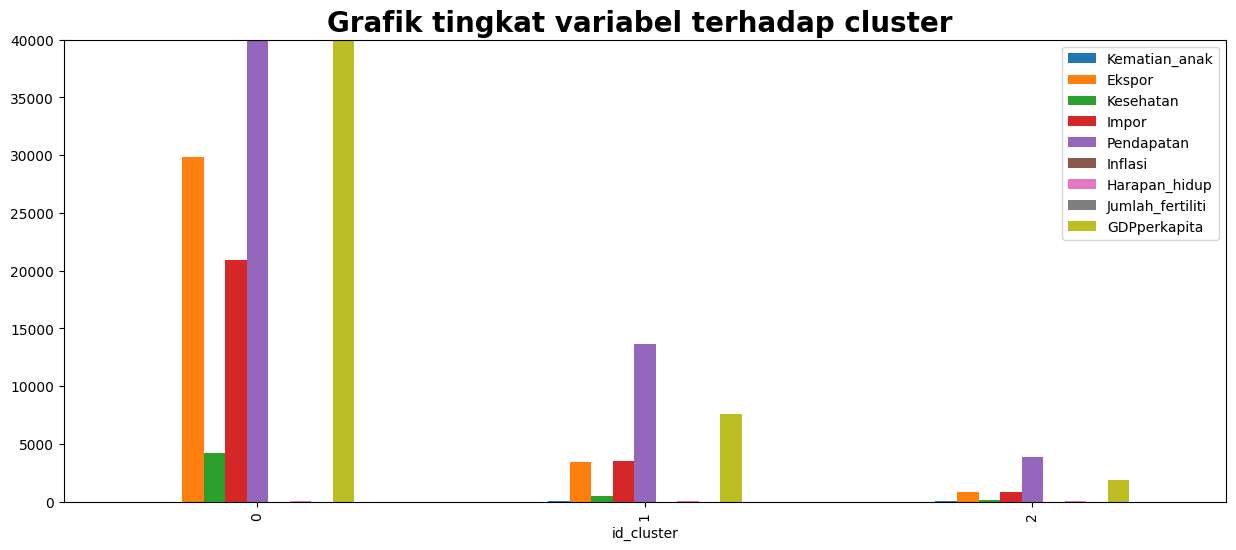

In [46]:
df_kmean.drop('Negara', axis = 1).groupby('id_cluster').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Grafik tingkat variabel terhadap cluster ",fontweight="bold", size=20)

plt.show()

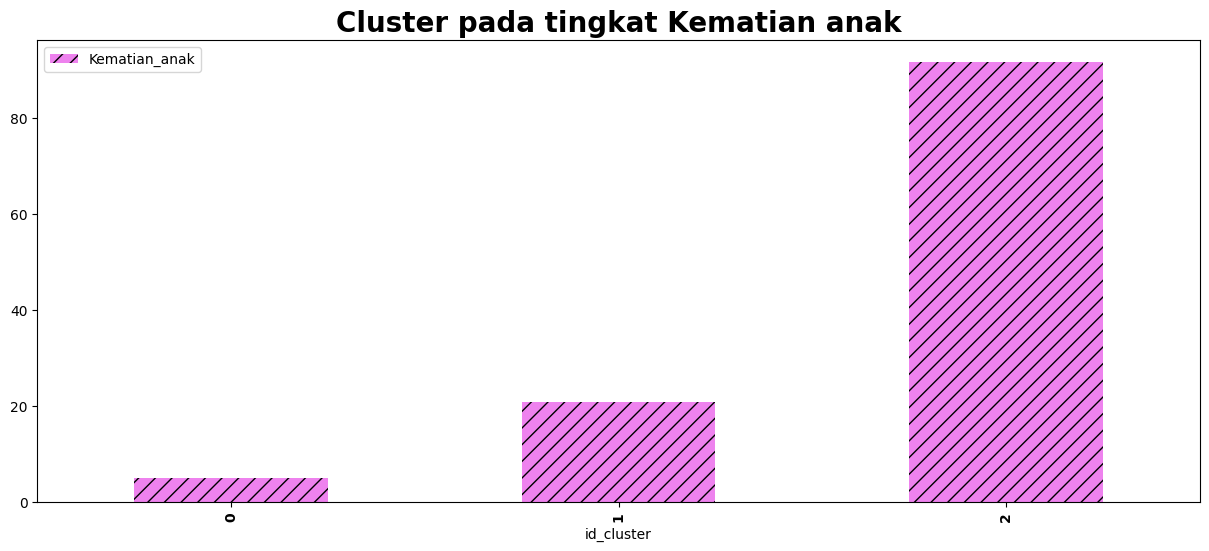

In [47]:
df_kmean.drop(['Negara', 'Ekspor', 'Kesehatan', 'Impor','Pendapatan', 'GDPperkapita',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti'],axis = 1).groupby('id_cluster').mean().plot.bar(figsize=(15,6),color='violet',hatch="//")
plt.title('Cluster pada tingkat Kematian anak', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

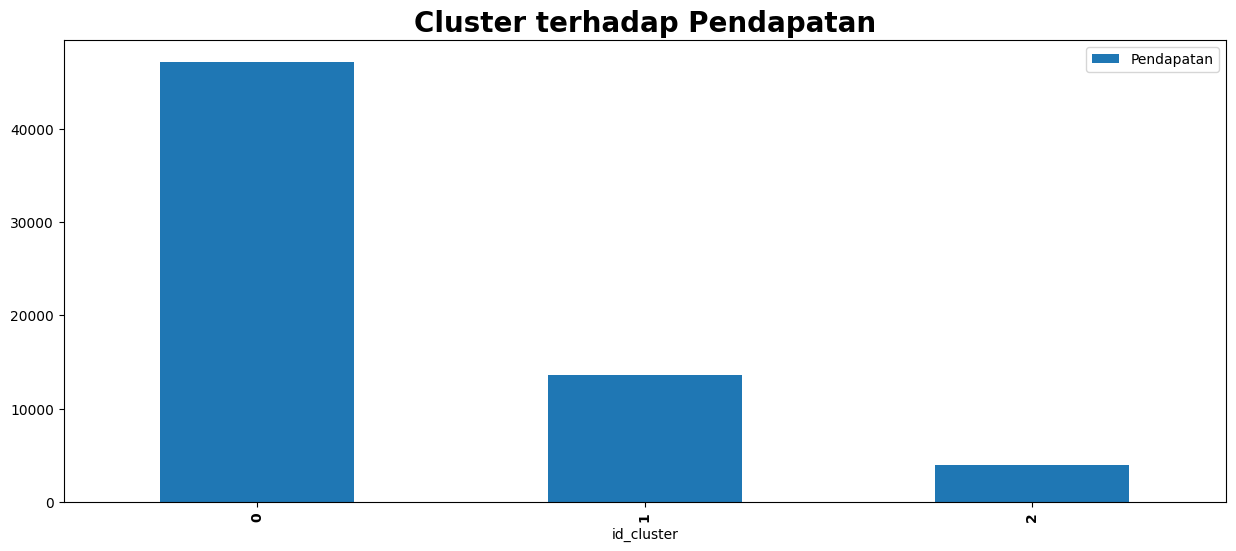

In [48]:
df_kmean.drop(['Negara', 'Ekspor', 'Kesehatan', 'Impor', 'Kematian_anak','GDPperkapita',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti'],axis = 1).groupby('id_cluster').mean().plot.bar(figsize=(15,6))
plt.title('Cluster terhadap Pendapatan',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

Dapat dilihat bahwa Cluster 2 memiliki tingkat Kematian anak yang tinggi dan Pendapatan rendah, maka dari itu harus diperhatikan lebih lanjut 

##Pengecekan isi dari Cluster 2 
####berdasarkan K-Mean

In [49]:
#Melakukan pengecekan Negara yang berada didalam Cluster 2
Kmean=df_kmean[df_kmean['id_cluster'] == 2]
Kmean.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [50]:
K=Kmean[['Negara']]
K= K.reset_index(drop=True)

In [51]:
Kmean.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [52]:
#Mengurutkan Negara yang membutuhkan bantuan
final=df_kmean[df_kmean['id_cluster'] == 2].sort_values(by = ['Kematian_anak','Pendapatan'], ascending = [False, True])
final.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,2
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2


In [53]:
Kmean=Kmean.sort_values(by=['Kematian_anak','Pendapatan'], ascending=[False,True])
Kmean.head()  

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


In [54]:
Kmean[['Negara']].head(10)

,Negara
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


##Analisis Final
####Cluster berdasarkan rata-rata

In [55]:
#Pengecekan rata-rata berdasarkan Cluster 2
final=df_kmean[df_kmean['id_cluster'] == 2].sort_values(by = ['Kematian_anak','Pendapatan'], ascending = [False, True])
final.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.450,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.200,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.370,59.5,6.5500,708.0,2
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,41.478,60.5,5.8400,2330.0,2
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.550,58.8,6.5636,348.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.800,57.5,6.5400,334.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2


In [56]:
Kmean.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,8.511174,6.384914,0.995640,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,71.100000,6.563600,17100.000000,2.0


In [57]:
#Pengambilan Kematian anak berdasarkan atas rata-rata
df_final = Kmean[Kmean['Kematian_anak']>91]
df_final.shape

(21, 11)

In [58]:
df_final.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,11.214429,56.547619,5.386533,1708.190476,2.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,10.199533,7.401798,0.966908,3607.677295,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,2.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,2.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,41.478000,68.200000,6.563600,17100.000000,2.0


In [59]:
#Nilai rata-rata pada pendapatan berdasarkan df_final_list adalah 3639, sekarang mengambil dibawah dari nilai rata-rata tersebut
df_final1 = df_final[df_final['Pendapatan']<3639]
df_final1.shape

(17, 11)

In [60]:
df_final1.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,id_cluster
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.415129,698.352941,2.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,0.983881,345.567638,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,6.563600,1310.000000,2.0


In [68]:
print('Negara yang membutuhkan bantuan berdasarkan K means')
Kmean[['Negara']].head()

Negara yang membutuhkan bantuan berdasarkan K means


,Negara
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


In [69]:
top_negara=df_final1['Negara']
top_negara=top_negara.reset_index(drop=True)
print('Negara yang membutuhkan bantuan berdasarkan faktor Ekonomi dan Kesehatan')
top_negara

Negara yang membutuhkan bantuan berdasarkan faktor Ekonomi dan Kesehatan


0                        Haiti
1                 Sierra Leone
2                         Chad
3     Central African Republic
4                         Mali
5                        Niger
6             Congo, Dem. Rep.
7                 Burkina Faso
8                Guinea-Bissau
9                        Benin
10               Cote d'Ivoire
11                      Guinea
12                    Cameroon
13                  Mozambique
14                     Lesotho
15                  Mauritania
16                     Burundi
Name: Negara, dtype: object